In [3]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [4]:
#Read data
attr = pd.read_csv('HR+attrition.csv')
attr.head()

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure
0,Employed,admin,6,0,4,0,high,5
1,Employed,admin,4,0,3,0,medium,6
2,Employed,admin,6,0,2,0,medium,2
3,Employed,admin,2,1,4,0,medium,3
4,Employed,admin,5,0,4,0,medium,3


In [5]:
# Importing Categorical Columns
attr_cust = attr[['Attrition_status', 'department', 'satisfaction', 'filed_complaint', 'projects', 'recently_promoted', 'salary', 'tenure']]
attr_cust.head()

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure
0,Employed,admin,6,0,4,0,high,5
1,Employed,admin,4,0,3,0,medium,6
2,Employed,admin,6,0,2,0,medium,2
3,Employed,admin,2,1,4,0,medium,3
4,Employed,admin,5,0,4,0,medium,3


In [6]:
# Converting satisfaction into categorical variable.
attr_cust['satisfaction'] = attr_cust['satisfaction'].astype('object',copy=False)

In [7]:
attr_cust.head()

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure
0,Employed,admin,6,0,4,0,high,5
1,Employed,admin,4,0,3,0,medium,6
2,Employed,admin,6,0,2,0,medium,2
3,Employed,admin,2,1,4,0,medium,3
4,Employed,admin,5,0,4,0,medium,3


In [8]:
attr_cust.shape

(12075, 8)

In [9]:
attr_cust.describe()

,filed_complaint,projects,recently_promoted,tenure
count,12075.000000,12075.000000,12075.000000,12075.000000
mean,0.143188,3.846377,0.021035,3.593292
std,0.350279,1.248489,0.143508,1.515632
min,0.000000,2.000000,0.000000,2.000000
25%,0.000000,3.000000,0.000000,3.000000
50%,0.000000,4.000000,0.000000,3.000000
75%,0.000000,5.000000,0.000000,4.000000
max,1.000000,7.000000,1.000000,10.000000


In [10]:
attr_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12075 entries, 0 to 12074
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Attrition_status   12075 non-null  object
 1   department         12075 non-null  object
 2   satisfaction       12075 non-null  object
 3   filed_complaint    12075 non-null  int64 
 4   projects           12075 non-null  int64 
 5   recently_promoted  12075 non-null  int64 
 6   salary             12075 non-null  object
 7   tenure             12075 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 754.8+ KB


In [11]:
# First we will keep a copy of data
attr_cust_copy = attr_cust.copy()

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
attr_cust = attr_cust.apply(le.fit_transform)
attr_cust.head()

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure
0,0,1,5,0,2,0,0,3
1,0,1,3,0,1,0,2,4
2,0,1,5,0,0,0,2,0
3,0,1,1,1,2,0,2,1
4,0,1,4,0,2,0,2,1


In [13]:
attr_cust.describe()

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure
count,12075.000000,12075.000000,12075.00000,12075.000000,12075.000000,12075.000000,12075.000000,12075.000000
mean,0.244306,5.364638,5.65648,0.143188,1.846377,0.021035,1.352381,1.576729
std,0.429693,3.176513,2.53805,0.350279,1.248489,0.143508,0.623621,1.449545
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,4.00000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,0.000000,7.000000,6.00000,0.000000,2.000000,0.000000,1.000000,1.000000
75%,0.000000,8.000000,8.00000,0.000000,3.000000,0.000000,2.000000,2.000000
max,1.000000,9.000000,9.00000,1.000000,5.000000,1.000000,2.000000,7.000000


In [14]:
import sys
!{sys.executable} -m pip install kmodes

## Using KModes Clustering on the data
### Hint: KModes(n_clusters= "Number of clusters", init = "Cao", n_init = 1, verbose=1)

## 2.1 Answer.

In [15]:
# Importing Libraries

from kmodes.kmodes import KModes
km_cao = KModes(n_clusters=3,init='Cao',n_init=1,verbose=1) #Write your code here
fitClusters_cao = km_cao.fit_predict(attr_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 450, cost: 37904.0


In [16]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(attr_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 45722.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 41503.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 450, cost: 37904.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1287, cost: 34853.0
Run 1, iteration: 2/100, moves: 1588, cost: 34853.0


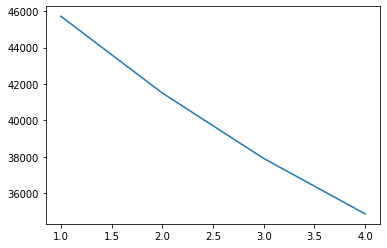

In [17]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [18]:
attr_cust1 = attr_cust_copy.reset_index()
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([attr_cust1, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)
combinedDf.head()

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure,cluster_predicted
0,Employed,admin,6,0,4,0,high,5,0
1,Employed,admin,4,0,3,0,medium,6,1
2,Employed,admin,6,0,2,0,medium,2,2
3,Employed,admin,2,1,4,0,medium,3,0
4,Employed,admin,5,0,4,0,medium,3,0


In [19]:
# determining the name of the file 
file_name = 'attrition_solution.xlsx'

In [20]:
# saving the excel 
combinedDf.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


# Answer 2.2 Part Solution 

#### Doing some EDA

In [21]:
attrCluster = pd.read_excel('attrition_solution.xlsx')

In [22]:
attrCluster.head()

,Unnamed: 0,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure,cluster_predicted
0,0,Employed,admin,6,0,4,0,high,5,0
1,1,Employed,admin,4,0,3,0,medium,6,1
2,2,Employed,admin,6,0,2,0,medium,2,2
3,3,Employed,admin,2,1,4,0,medium,3,0
4,4,Employed,admin,5,0,4,0,medium,3,0


In [23]:
attrCluster.drop('Unnamed: 0',axis=1,inplace=True)

In [24]:
attrCluster.head()

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure,cluster_predicted
0,Employed,admin,6,0,4,0,high,5,0
1,Employed,admin,4,0,3,0,medium,6,1
2,Employed,admin,6,0,2,0,medium,2,2
3,Employed,admin,2,1,4,0,medium,3,0
4,Employed,admin,5,0,4,0,medium,3,0


In [25]:
attrCluster.Attrition_status.unique()

array(['Employed', 'Left'], dtype=object)

In [26]:
attrCluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12075 entries, 0 to 12074
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Attrition_status   12075 non-null  object
 1   department         12075 non-null  object
 2   satisfaction       12075 non-null  int64 
 3   filed_complaint    12075 non-null  int64 
 4   projects           12075 non-null  int64 
 5   recently_promoted  12075 non-null  int64 
 6   salary             12075 non-null  object
 7   tenure             12075 non-null  int64 
 8   cluster_predicted  12075 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 849.1+ KB


### Analysis of Clusters with Attrition Status

In [27]:
attrCluster.groupby(['cluster_predicted']).Attrition_status.value_counts().unstack()

Attrition_status,Employed,Left
cluster_predicted,,
0,6208,1449
1,716,1331
2,2201,170


In [28]:
round((attrCluster.groupby(['cluster_predicted']).Attrition_status.value_counts(normalize = True)*100)).unstack()

Attrition_status,Employed,Left
cluster_predicted,,
0,81.0,19.0
1,35.0,65.0
2,93.0,7.0


### Clusters - Salary - Attrition

In [29]:
(attrCluster.groupby(["cluster_predicted","Attrition_status"]).salary.value_counts()).unstack()

salary                              high   low  medium
cluster_predicted Attrition_status                    
0                 Employed           651  3710    1847
                  Left                26  1247     176
1                 Employed            50    47     619
                  Left                29   500     802
2                 Employed           210   298    1693
                  Left                 4    78      88

In [30]:
clusterToSalaryPct = round(((attrCluster.groupby(["cluster_predicted","Attrition_status"]).salary.value_counts(normalize = True)*100))).unstack()
clusterToSalaryPct

salary                              high   low  medium
cluster_predicted Attrition_status                    
0                 Employed          10.0  60.0    30.0
                  Left               2.0  86.0    12.0
1                 Employed           7.0   7.0    86.0
                  Left               2.0  38.0    60.0
2                 Employed          10.0  14.0    77.0
                  Left               2.0  46.0    52.0

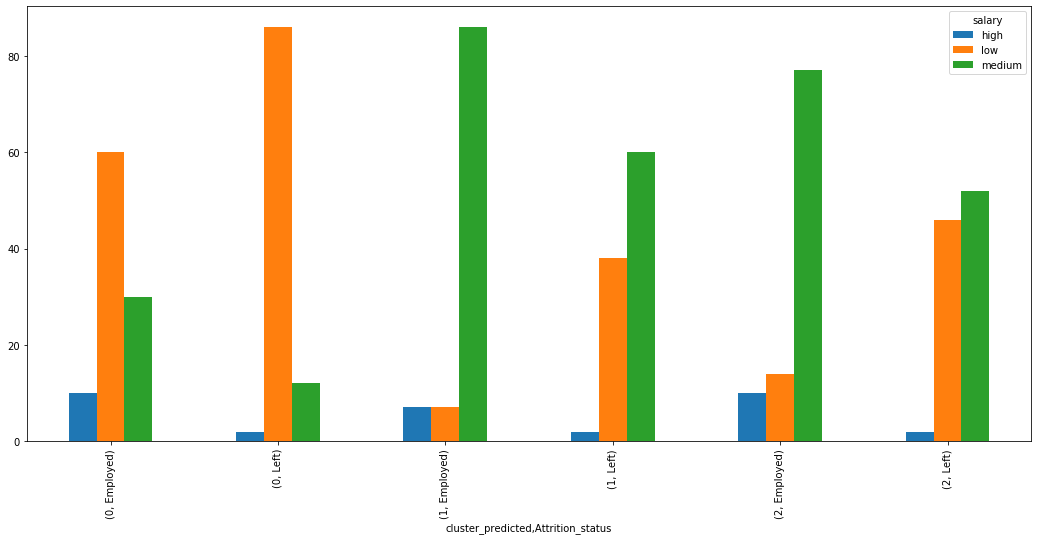

In [31]:
fig, ax = plt.subplots(figsize=(18,8))
clusterToSalaryPct.plot.bar(ax=ax)

### Cluster - Projects - Attrition

In [32]:
attrCluster.groupby(["cluster_predicted","Attrition_status"]).projects.value_counts().unstack()

projects                                2       3       4      5      6      7
cluster_predicted Attrition_status                                            
0                 Employed          472.0  1976.0  2692.0  766.0  302.0    NaN
                  Left              879.0    10.0   249.0  214.0   71.0   26.0
1                 Employed           34.0   526.0    50.0   54.0   52.0    NaN
                  Left              308.0    47.0    87.0  168.0  518.0  203.0
2                 Employed          162.0   641.0   354.0  963.0   81.0    NaN
                  Left                1.0     1.0    10.0  158.0    NaN    NaN

In [33]:
clusterToProjetcsPct = round((attrCluster.groupby(["cluster_predicted","Attrition_status"]).projects.value_counts(normalize = True)*100),2).unstack()
clusterToProjetcsPct

projects                                2      3      4      5      6      7
cluster_predicted Attrition_status                                          
0                 Employed           7.60  31.83  43.36  12.34   4.86    NaN
                  Left              60.66   0.69  17.18  14.77   4.90   1.79
1                 Employed           4.75  73.46   6.98   7.54   7.26    NaN
                  Left              23.14   3.53   6.54  12.62  38.92  15.25
2                 Employed           7.36  29.12  16.08  43.75   3.68    NaN
                  Left               0.59   0.59   5.88  92.94    NaN    NaN

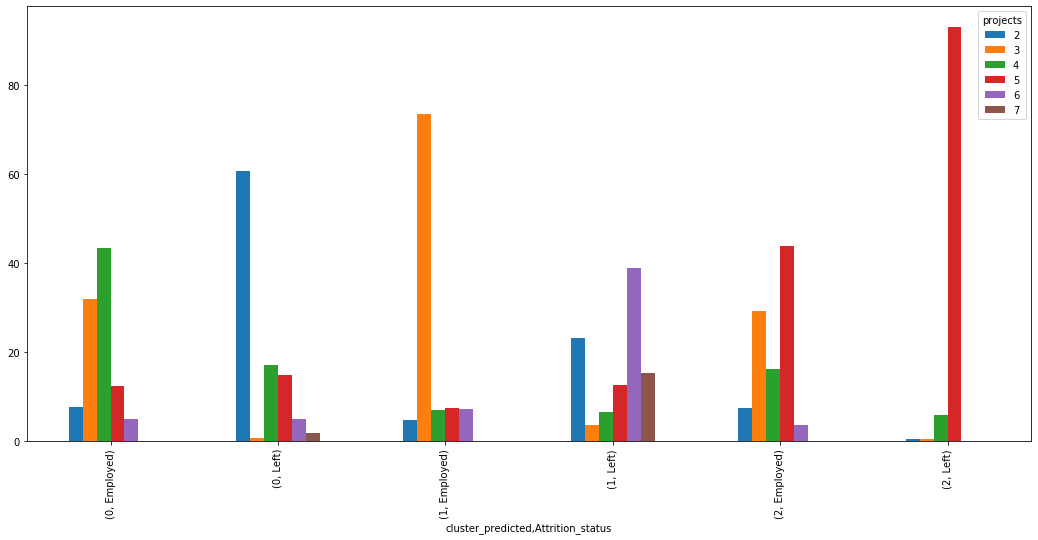

In [34]:
fig, ax = plt.subplots(figsize=(18,8))

clusterToProjetcsPct.plot.bar(ax=ax)

### Cluster - Tenure - Attrition

In [35]:
attrCluster.groupby(["cluster_predicted","Attrition_status"]).tenure.value_counts().unstack()

tenure                                  2       3      4      5      6   \
cluster_predicted Attrition_status                                        
0                 Employed          1130.0  3182.0  867.0  359.0  287.0   
                  Left                16.0   900.0   68.0  375.0   90.0   
1                 Employed            89.0    99.0  395.0   51.0   47.0   
                  Left                20.0   294.0  726.0  240.0   51.0   
2                 Employed          1201.0   401.0  229.0  147.0  110.0   
                  Left                 5.0     NaN    NaN  127.0   38.0   

tenure                                 7      8      10  
cluster_predicted Attrition_status                       
0                 Employed          133.0  103.0  147.0  
                  Left                NaN    NaN    NaN  
1                 Employed            5.0   13.0   17.0  
                  Left                NaN    NaN    NaN  
2                 Employed           44.0   33.0   36.0  
                  Left                NaN    NaN    NaN

In [36]:
clusterToTenurePct = (round(attrCluster.groupby(["cluster_predicted","Attrition_status"]).tenure.value_counts(normalize = True)*100)).unstack()
clusterToTenurePct

tenure                                2     3     4     5     6    7    8   \
cluster_predicted Attrition_status                                           
0                 Employed          18.0  51.0  14.0   6.0   5.0  2.0  2.0   
                  Left               1.0  62.0   5.0  26.0   6.0  NaN  NaN   
1                 Employed          12.0  14.0  55.0   7.0   7.0  1.0  2.0   
                  Left               2.0  22.0  55.0  18.0   4.0  NaN  NaN   
2                 Employed          55.0  18.0  10.0   7.0   5.0  2.0  1.0   
                  Left               3.0   NaN   NaN  75.0  22.0  NaN  NaN   

tenure                               10  
cluster_predicted Attrition_status       
0                 Employed          2.0  
                  Left              NaN  
1                 Employed          2.0  
                  Left              NaN  
2                 Employed          2.0  
                  Left              NaN

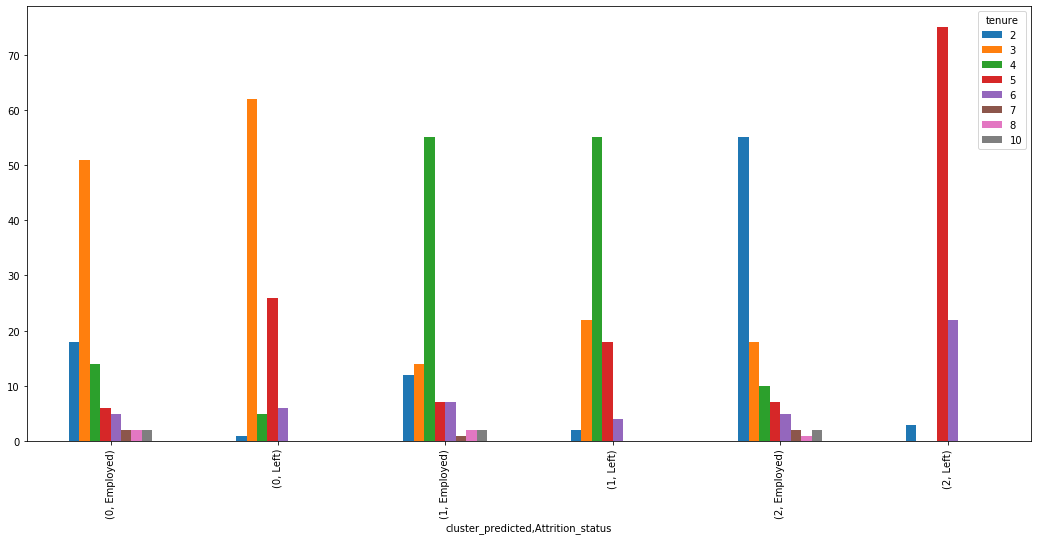

In [37]:
fig, ax = plt.subplots(figsize=(18,8))

clusterToTenurePct.plot.bar(ax=ax)

### Cluster - Satisfaction - Attrition

In [38]:
attrCluster.groupby(["cluster_predicted","Attrition_status"]).satisfaction.value_counts().unstack()

satisfaction                           1      2      3      4      5      6   \
cluster_predicted Attrition_status                                             
0                 Employed            9.0  224.0  296.0  205.0  405.0  936.0   
                  Left               67.0    7.0   23.0  361.0  484.0   46.0   
1                 Employed            3.0   98.0   35.0   33.0   47.0  117.0   
                  Left              242.0  502.0   12.0  112.0  201.0   36.0   
2                 Employed            7.0   50.0  107.0   60.0  149.0  332.0   
                  Left                1.0    NaN    NaN    NaN    NaN    NaN   

satisfaction                            7       8      9       10  
cluster_predicted Attrition_status                                 
0                 Employed          1055.0  1307.0  692.0  1079.0  
                  Left                22.0   216.0  156.0    67.0  
1                 Employed           126.0    66.0   76.0   115.0  
                  Left                19.0    49.0  102.0    56.0  
2                 Employed           345.0   162.0  624.0   365.0  
                  Left                 2.0    17.0  138.0    12.0

In [39]:
clusterToSatisPct = (round(attrCluster.groupby(["cluster_predicted","Attrition_status"]).satisfaction.value_counts(normalize = True)*100)).unstack()
clusterToSatisPct

satisfaction                          1     2    3     4     5     6     7   \
cluster_predicted Attrition_status                                            
0                 Employed           0.0   4.0  5.0   3.0   7.0  15.0  17.0   
                  Left               5.0   0.0  2.0  25.0  33.0   3.0   2.0   
1                 Employed           0.0  14.0  5.0   5.0   7.0  16.0  18.0   
                  Left              18.0  38.0  1.0   8.0  15.0   3.0   1.0   
2                 Employed           0.0   2.0  5.0   3.0   7.0  15.0  16.0   
                  Left               1.0   NaN  NaN   NaN   NaN   NaN   1.0   

satisfaction                          8     9     10  
cluster_predicted Attrition_status                    
0                 Employed          21.0  11.0  17.0  
                  Left              15.0  11.0   5.0  
1                 Employed           9.0  11.0  16.0  
                  Left               4.0   8.0   4.0  
2                 Employed           7.0  28.0  17.0  
                  Left              10.0  81.0   7.0

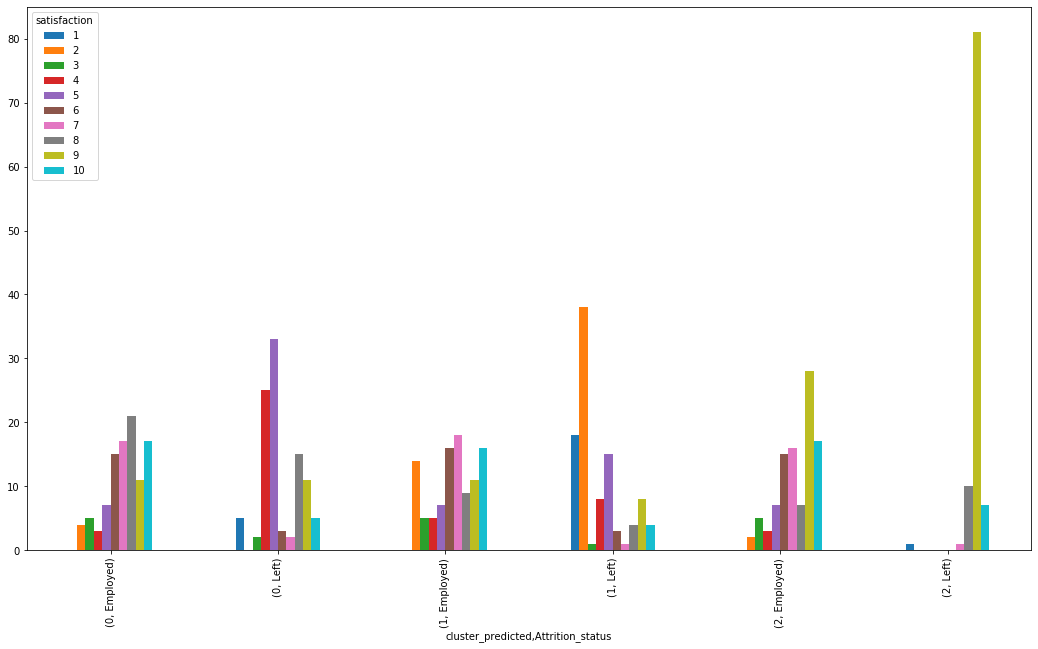

In [40]:
fig, ax = plt.subplots(figsize=(18,10))

clusterToSatisPct.plot.bar(ax=ax)

### Cluster - FiledComplaint - Attrition

In [41]:
attrCluster.groupby(["cluster_predicted","Attrition_status"]).filed_complaint.value_counts().unstack()

filed_complaint                        0     1
cluster_predicted Attrition_status            
0                 Employed          5133  1075
                  Left              1389    60
1                 Employed           576   140
                  Left              1260    71
2                 Employed          1828   373
                  Left               160    10

In [42]:
clusterToFiledComp = (round(attrCluster.groupby(["cluster_predicted","Attrition_status"]).filed_complaint.value_counts(normalize = True),2)*100).unstack()
clusterToFiledComp

filed_complaint                        0     1
cluster_predicted Attrition_status            
0                 Employed          83.0  17.0
                  Left              96.0   4.0
1                 Employed          80.0  20.0
                  Left              95.0   5.0
2                 Employed          83.0  17.0
                  Left              94.0   6.0

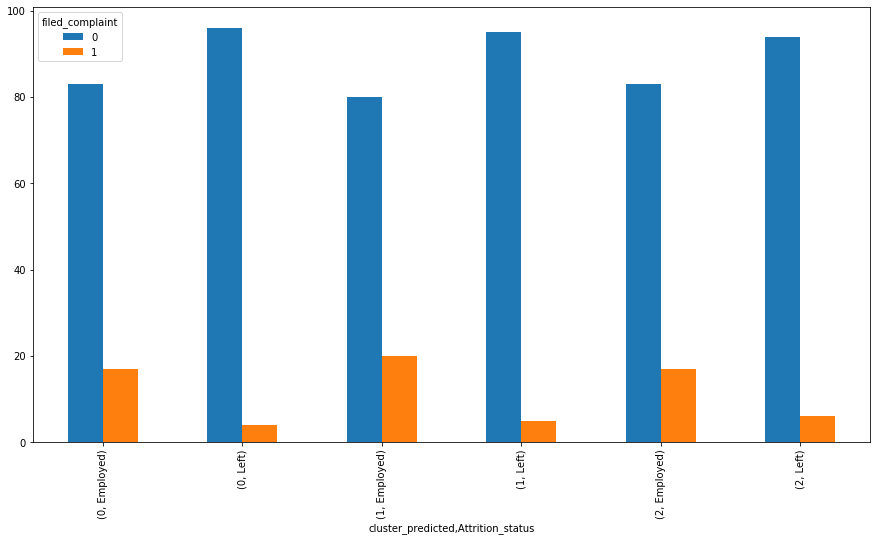

In [43]:
fig, ax = plt.subplots(figsize=(15,8))

clusterToFiledComp.plot.bar(ax=ax)